In [1]:
library('tidyverse')
library('repr')
library("rvest")

options(repr.plot.widht=4, repr.plot.height=3, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding




In [2]:
world.map <- function(data, title = "", theme = theme_void(), func = function(x)x ) {
    require(maps)

    world_map <- map_data("world")
    map.data <- left_join(world_map, data, by="region")


    plot <- ggplot(map.data, aes(x = long, y = lat, group = group)) + 
        geom_polygon(aes(fill = func(x) ), color = "white", size=0) + 
        scale_fill_distiller(palette = "Blues", na.value = "grey") + theme_void() + theme + 
        ggtitle(title)

    return(plot)
}
                      
theme1 <- theme(legend.position = 'none', 
               plot.title = element_text(color="grey", size=9)
              )

theme2 <- theme(legend.position = 'none', 
               plot.title = element_text(color="grey", size=9),
               plot.subtitle = element_text(color="grey", size=8),
               axis.title.x = element_text(color="grey", size=7),
               axis.title.y = element_text(color="grey", size=7),
               axis.text.y = element_text(color="grey", size=6),
               axis.text.x = element_text(color="grey", size=6),
              )

In [3]:
## Lee estadísticas del día
webpage <- read_html("https://www.worldometers.info/coronavirus/")
table <- html_nodes(webpage, "table")
raw_data <- html_table(table[[1]], trim=TRUE, fill=TRUE, dec=".")

data <- raw_data %>%
    rename_at(vars(contains("Cases/1M pop")), function(x){"Cases.1M"}) %>%
    rename_at(vars(contains("/1M pop")), function(x){str_replace(x, "/1M pop", ".1M")}) %>%
    rename(
        Country = "Country,Other",
        Critical = "Serious,Critical"
    ) %>%
    mutate(Continent = replace(Continent, Continent == "Australia/Oceania", "Oceania"),
           Country = replace(Country, Country == "DRC", "Democratic Republic of the Congo"),
           Country = replace(Country, Country == "CAR", "Central African Republic"),
           Country = replace(Country, Country == "Congo", "Republic of Congo"),
           Country = replace(Country, Country == "UAE", "United Arab Emirates"),
           Country = replace(Country, Country == "S. Korea", "South Korea"),
           Country = replace(Country, Country == "Czechia", "Czech Republic"),
           Country = replace(Country, Country == "North Macedonia", "Macedonia"),
           TotalCases = as.numeric(gsub(',','',TotalCases)),
           TotalTests = as.numeric(gsub(',','',TotalTests)),
           TotalDeaths = as.numeric(gsub(',','',TotalDeaths)),
           NewDeaths = as.numeric(gsub(',','',NewDeaths)),
           NewCases = as.numeric(gsub(',','',NewCases)),
           TotalRecovered = as.numeric(gsub(',','',TotalRecovered)),
           ActiveCases = as.numeric(gsub(',','',ActiveCases)),
           Critical = as.numeric(gsub(',','',Critical)),
           Cases.1M = as.numeric(gsub(',','',Cases.1M)),
           Tests.1M = as.numeric(gsub(',','',Tests.1M)),
           Deaths.1M = as.numeric(gsub(',','',Deaths.1M)),
           Continent = as.factor(Continent),
           positive.rate = TotalCases/TotalTests,
           fatality.rate = TotalDeaths/TotalCases,
           growth.rate = NewCases/(TotalCases - NewCases),
           critical.rate = Critical/ActiveCases
    ) %>%
    filter(Country != Continent & Country != "World" & Country != "Total:" & Continent != "")

Warning message:
“NAs introducidos por coerción”


In [4]:
webpage <- read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita")
table <- html_nodes(webpage, "table")
raw_data <- html_table(table[[5]], trim=TRUE, fill=TRUE, dec=".")
names(raw_data) <- c('rank','Country', 'GDP.percapita', 'year')

gdp <- raw_data %>%
    mutate(GDP.percapita = gsub(',','', GDP.percapita),
           GDP.percapita = as.numeric(GDP.percapita),
           Country = replace(Country, Country == "United States", "USA"),
           Country = replace(Country, Country == "United Kingdom", "UK"),
           Country = replace(Country, Country == "Korea, South", "South Korea"),
           Country = replace(Country, Country == "Korea, North", "North Korea"),
           Country = replace(Country, Country == "Congo, Republic of the", "Republic of Congo"),
           Country = replace(Country, Country == "Congo, Democratic Republic of the", "Democratic Republic of the Congo"),
           Country = replace(Country, Country == "Palestine, State of", "Palestine"),
           Country = replace(Country, Country == "Bahamas, The", "Bahamas"),
           Country = replace(Country, Country == "Cape Verde", "Cabo Verde"),
           Country = replace(Country, Country == "Faroe Islands", "Faeroe Islands"),
           Country = replace(Country, Country == "Gambia, The", "Gambia"),
           Country = replace(Country, Country == "Côte d'Ivoire", "Ivory Coast"),
           Country = replace(Country, Country == "Saint Pierre and Miquelon", "Saint Pierre Miquelon"),
           Country = replace(Country, Country == "São Tomé and Príncipe", "Sao Tome and Principe"),
           Country = replace(Country, Country == "Saint Vincent and the Grenadines", "St. Vincent Grenadines"),
           Country = replace(Country, Country == "Turks and Caicos Islands", "Turks and Caicos"),
           Country = replace(Country, Country == "Faroe Islands", "Faeroe Islands"),
           Country = replace(Country, Country == "Faroe Islands", "Faeroe Islands"),
          ) %>% 
    select(Country, GDP.percapita)

Warning message:
“NAs introducidos por coerción”


# Análisis de Covid-19 

Los datos para este análisis se extrajeron desde [worldometers](https://www.worldometers.info/coronavirus/)

## Distribución de casos 

Los siguiente gráfico muestra la distribución a nivel mundial de casos activos y la cantidad de casos en relación a la población

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




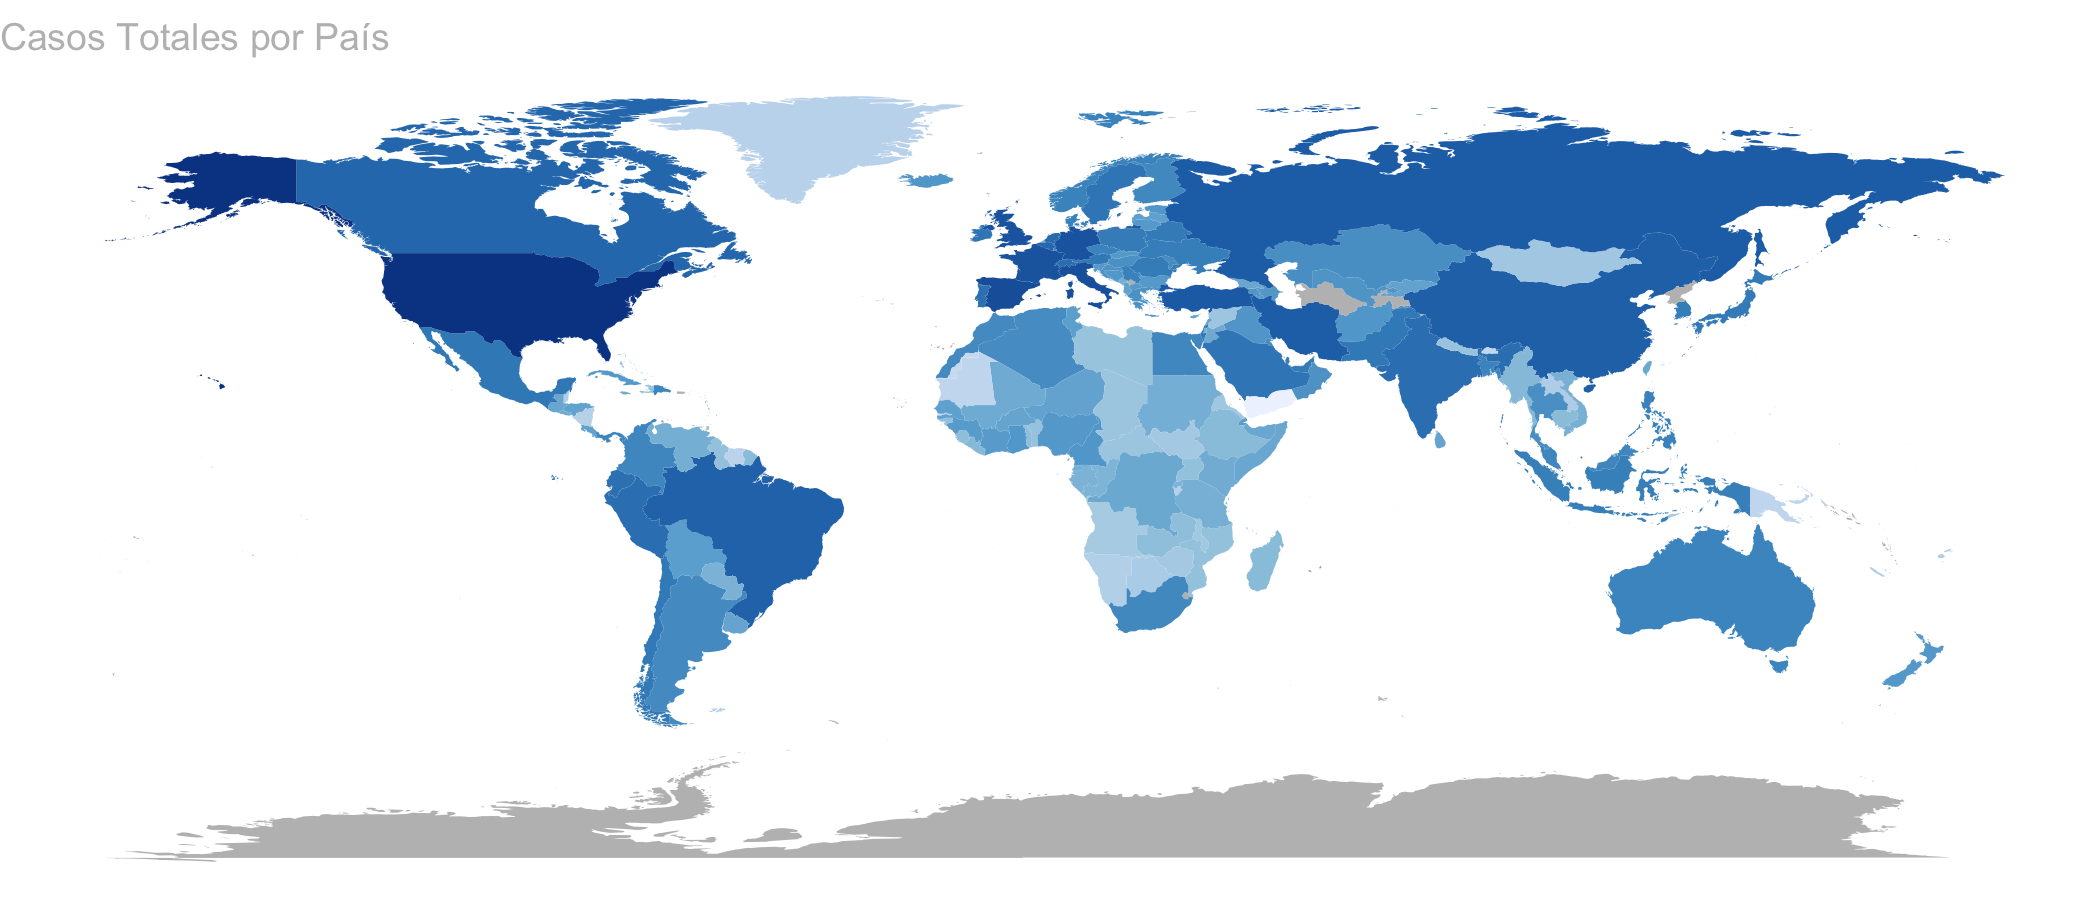

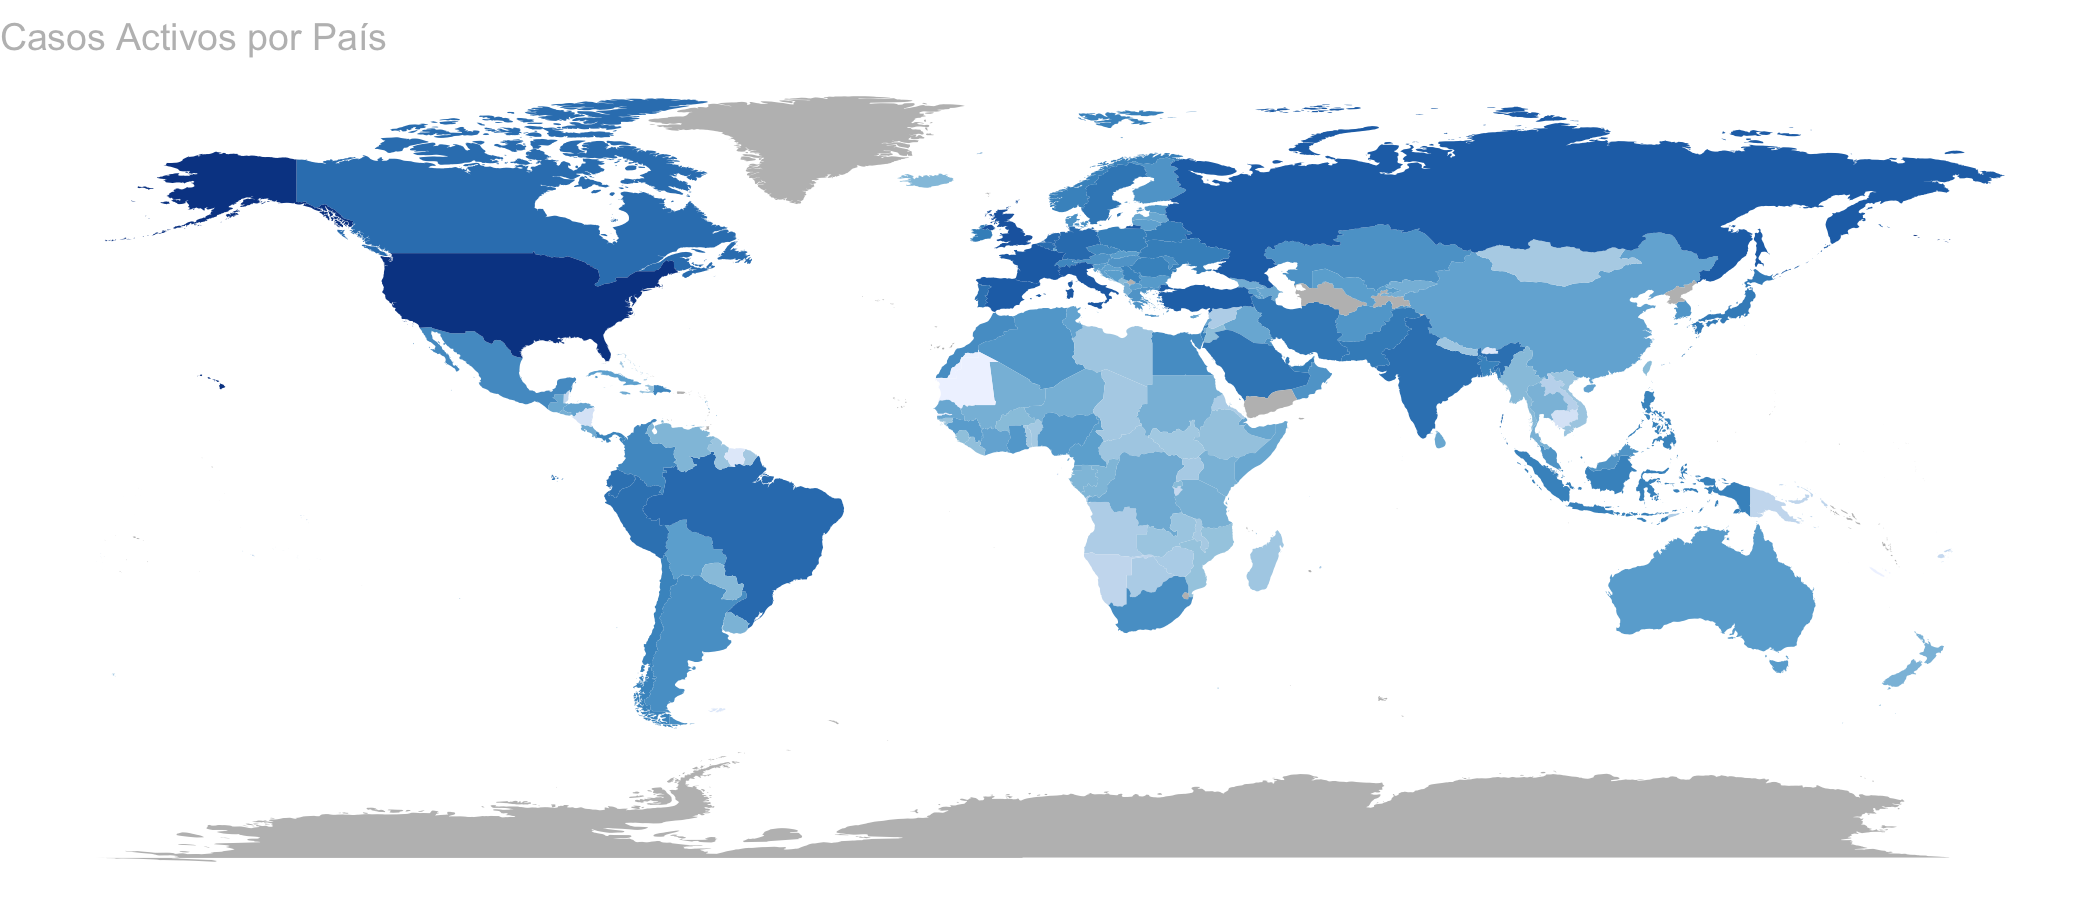

Selecting by Cases.1M



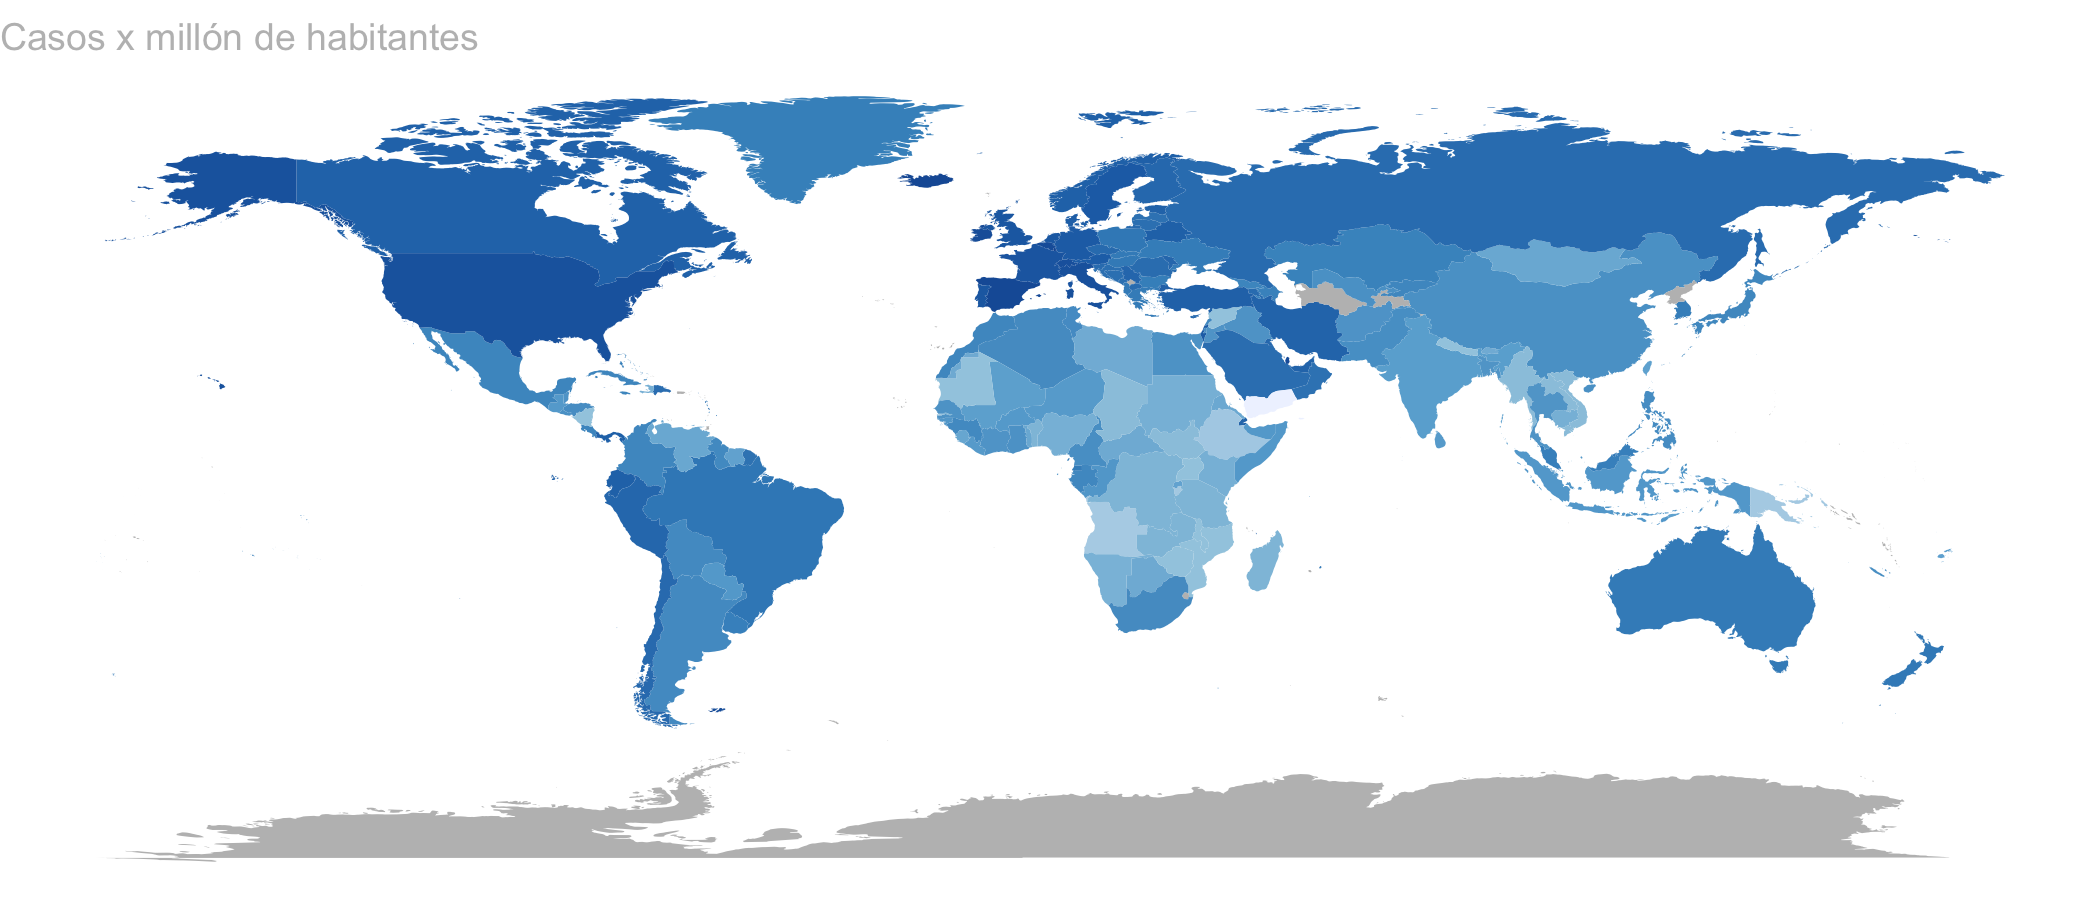

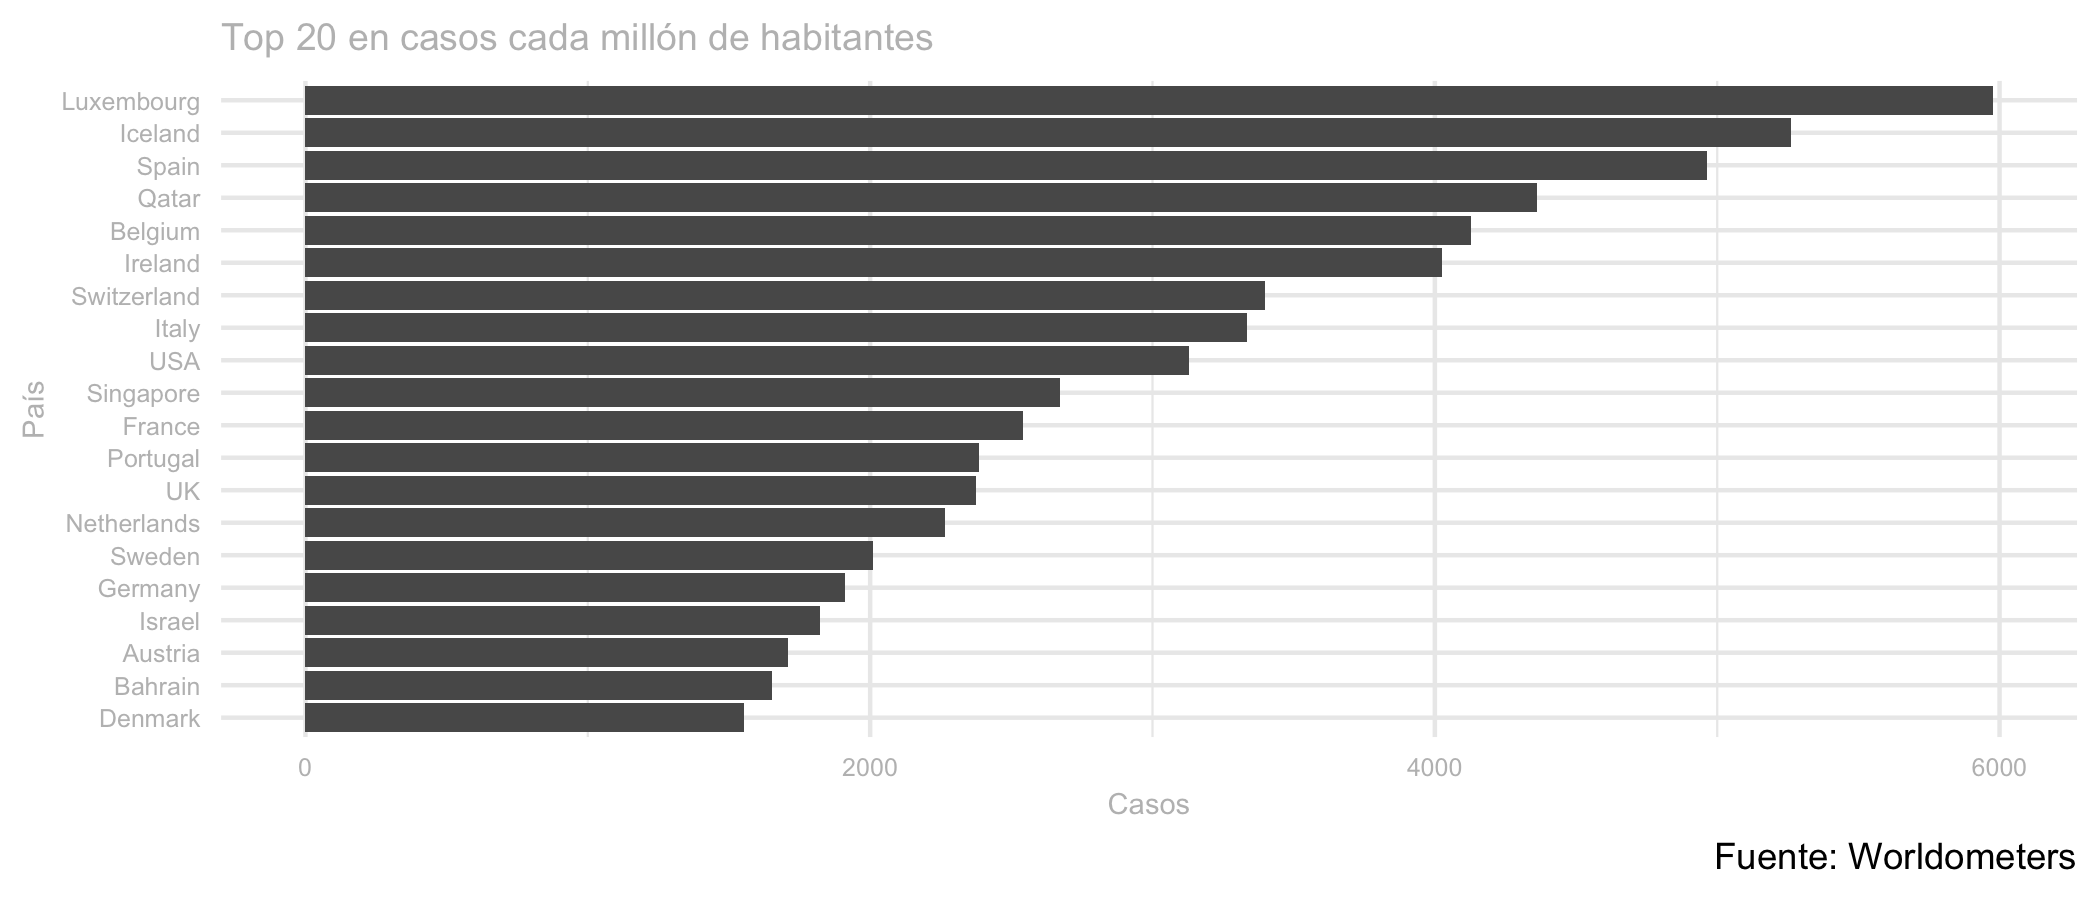

In [5]:
data %>%
    select(region = Country, x=TotalCases) %>%
    world.map(theme = theme1, title = "Casos Totales por País", func = function(x){-log10(x)})

data %>%
    select(region = Country, x=ActiveCases) %>%
    world.map(theme = theme1, title = "Casos Activos por País", func = function(x){-log10(x)})

data %>%
    select(region = Country, x=Cases.1M) %>%
    world.map(theme = theme1, title = "Casos x millón de habitantes", func = function(x){-log10(x)})

data %>%
    filter(TotalCases >= 1000) %>%
    arrange(desc(Cases.1M)) %>%
    select(Country, Cases.1M) %>%
    top_n(20) %>%
    ggplot(aes(x=reorder(Country,Cases.1M),y=Cases.1M)) + 
    geom_bar(stat = 'identity') +
    ylab("Casos") +
    xlab("País") +
    labs(
        title = "Top 20 en casos cada millón de habitantes",
        caption="Fuente: Worldometers")+
    theme_minimal()+theme2+
    theme(axis.text.y = element_text( hjust = 1, size = 6)) + 
    coord_flip()


## Testeos

La distribución de testeos por millón de habitantes es la siguiente

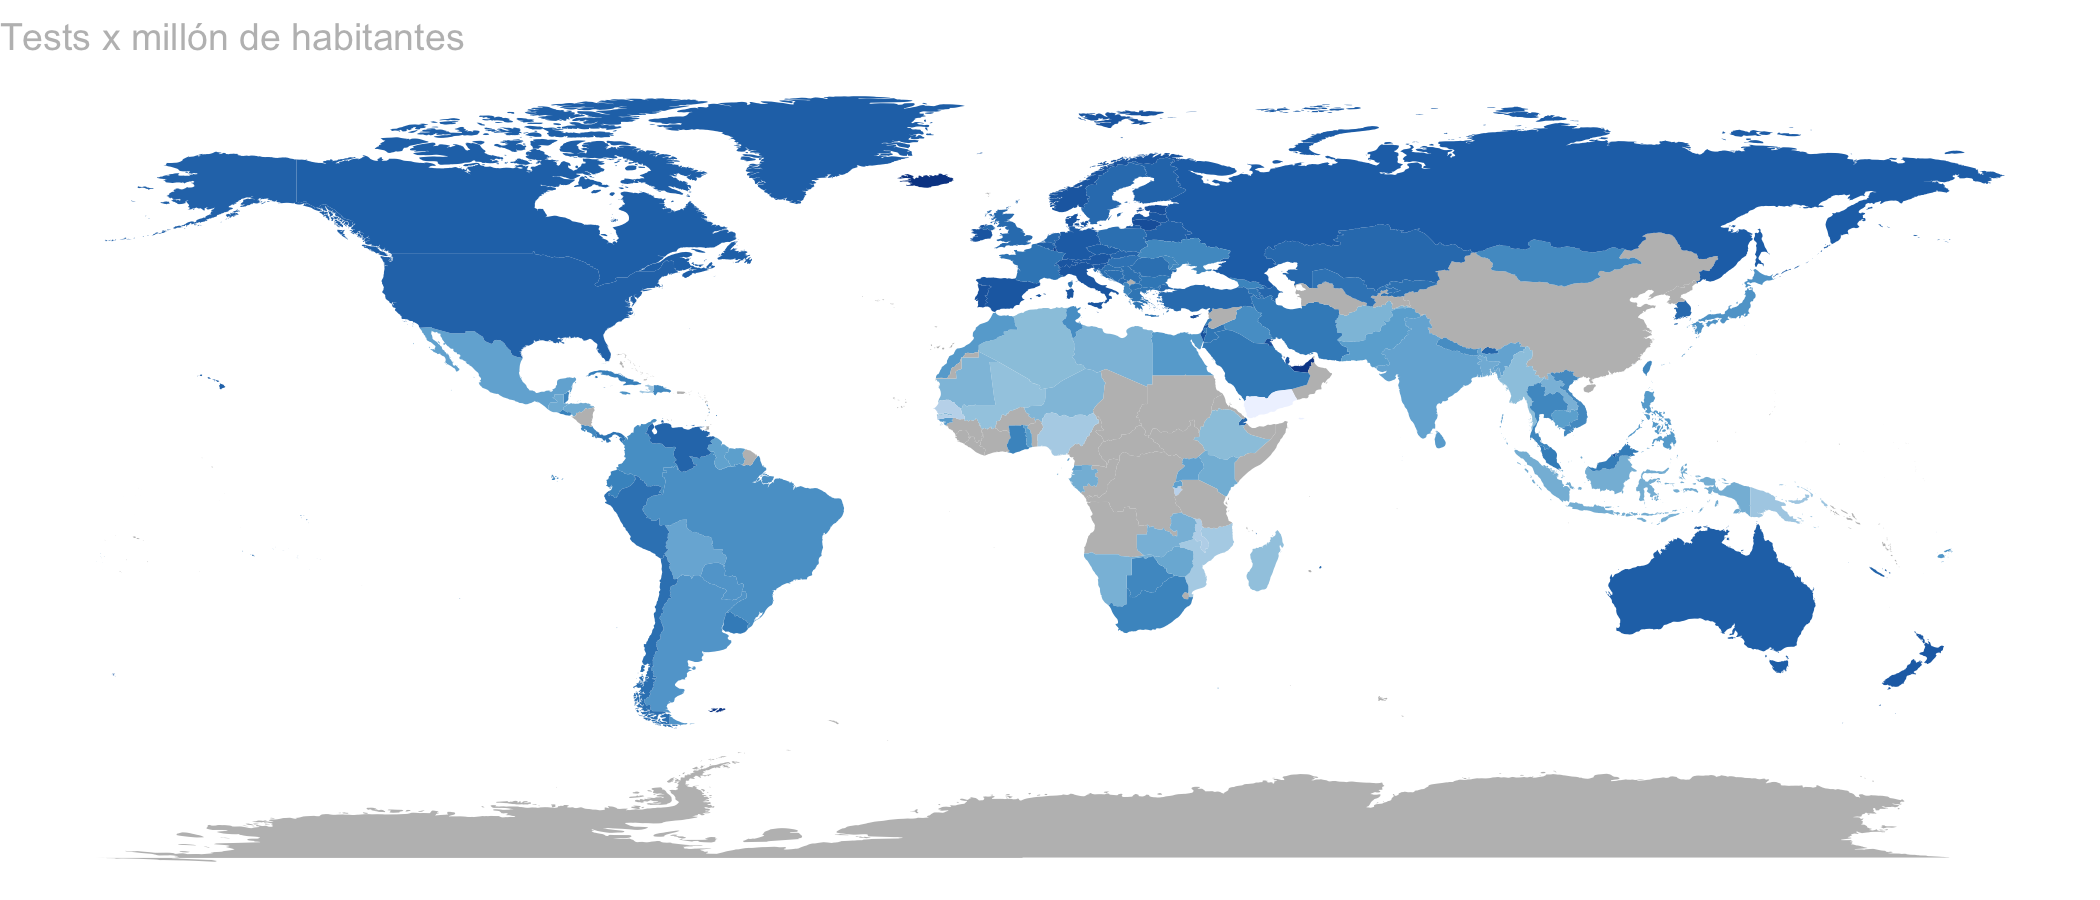

In [6]:
data %>%
    select(region = Country, x=Tests.1M) %>%
    world.map(theme = theme1, title = "Tests x millón de habitantes", func = function(x){-log10(x)})

Selecting by Tests.1M



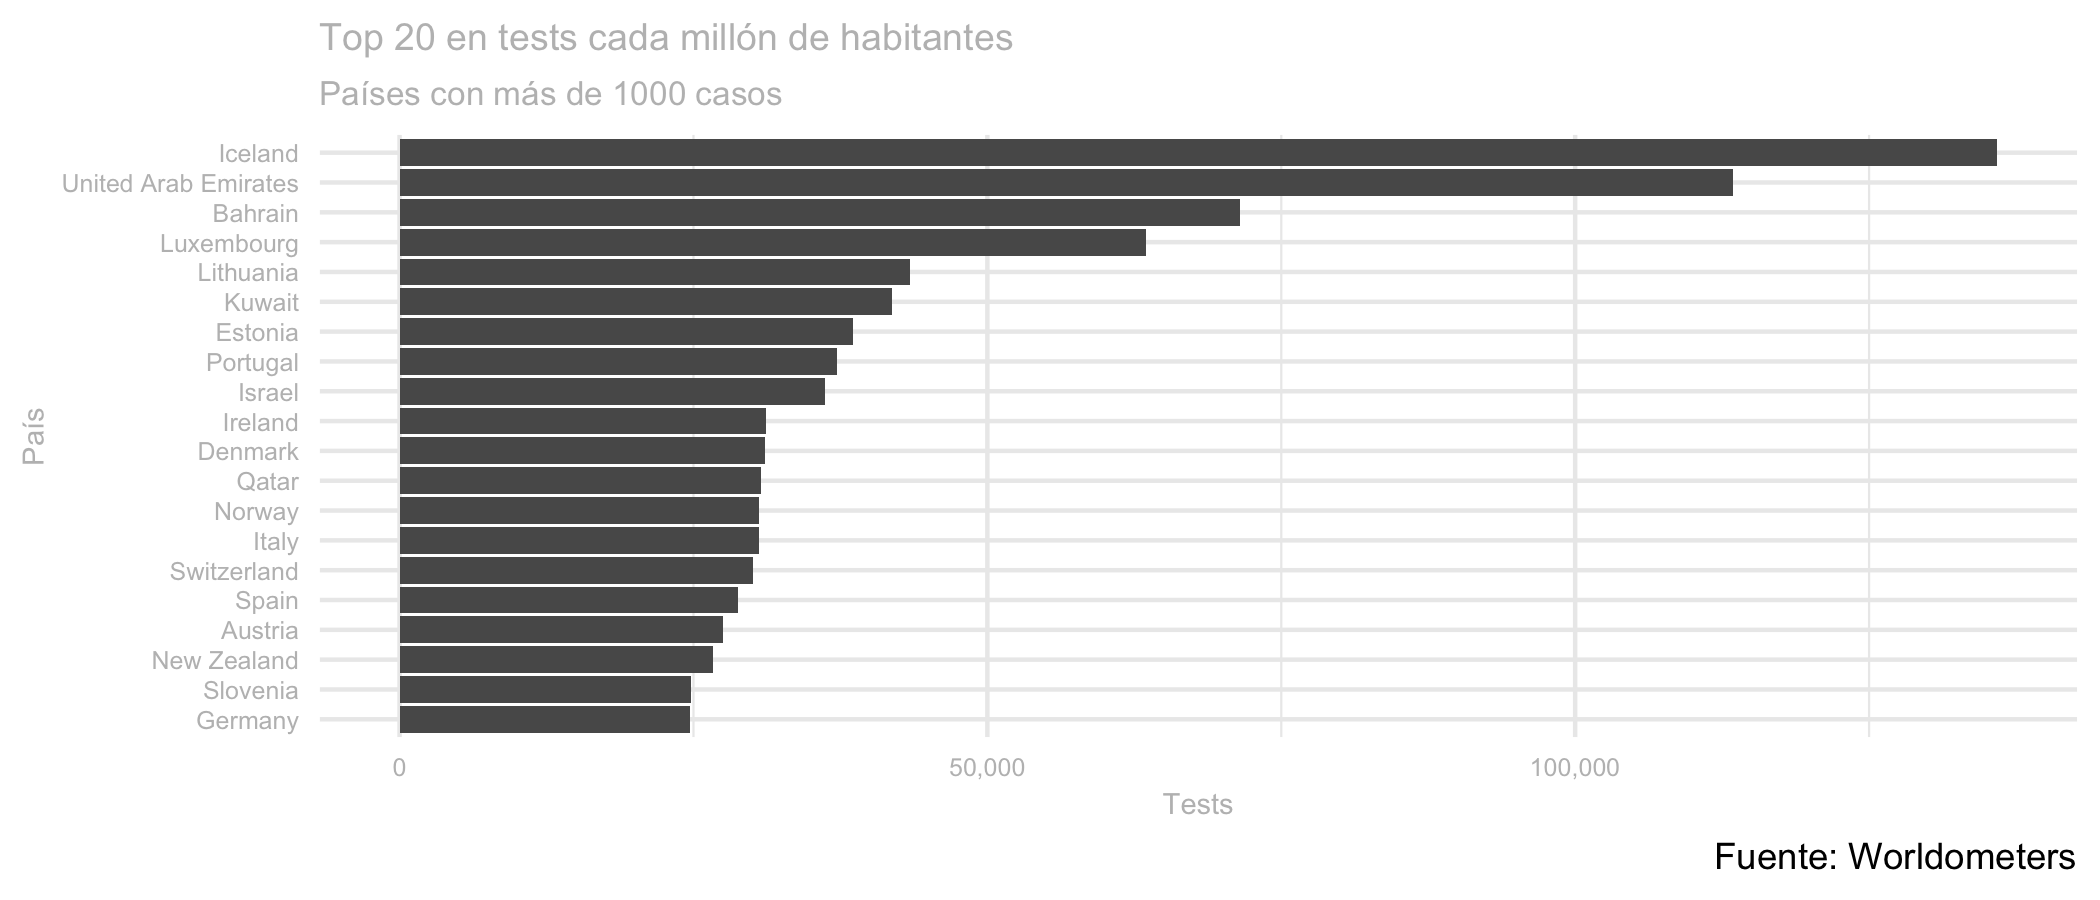

In [7]:
data %>%
    filter(TotalCases >= 1000) %>%
    arrange(desc(Tests.1M)) %>%
    select(Country, Tests.1M) %>%
    top_n(20) %>%
    ggplot(aes(x=reorder(Country,Tests.1M),y=Tests.1M)) + 
    geom_bar(stat = 'identity') +
    scale_y_continuous(labels = scales::comma) +
    ylab("Tests") +
    xlab("País") +
    labs(
        title = "Top 20 en tests cada millón de habitantes",
        subtitle = "Países con más de 1000 casos",
        caption="Fuente: Worldometers")+
    theme_minimal() + theme2 +
    theme(axis.text.y = element_text( hjust = 1, size = 6)) + 
    coord_flip() 


## Indicadores

La tasa de letalidad y el % de positivos (Casos/Testeos) parecen tener una correlación directa

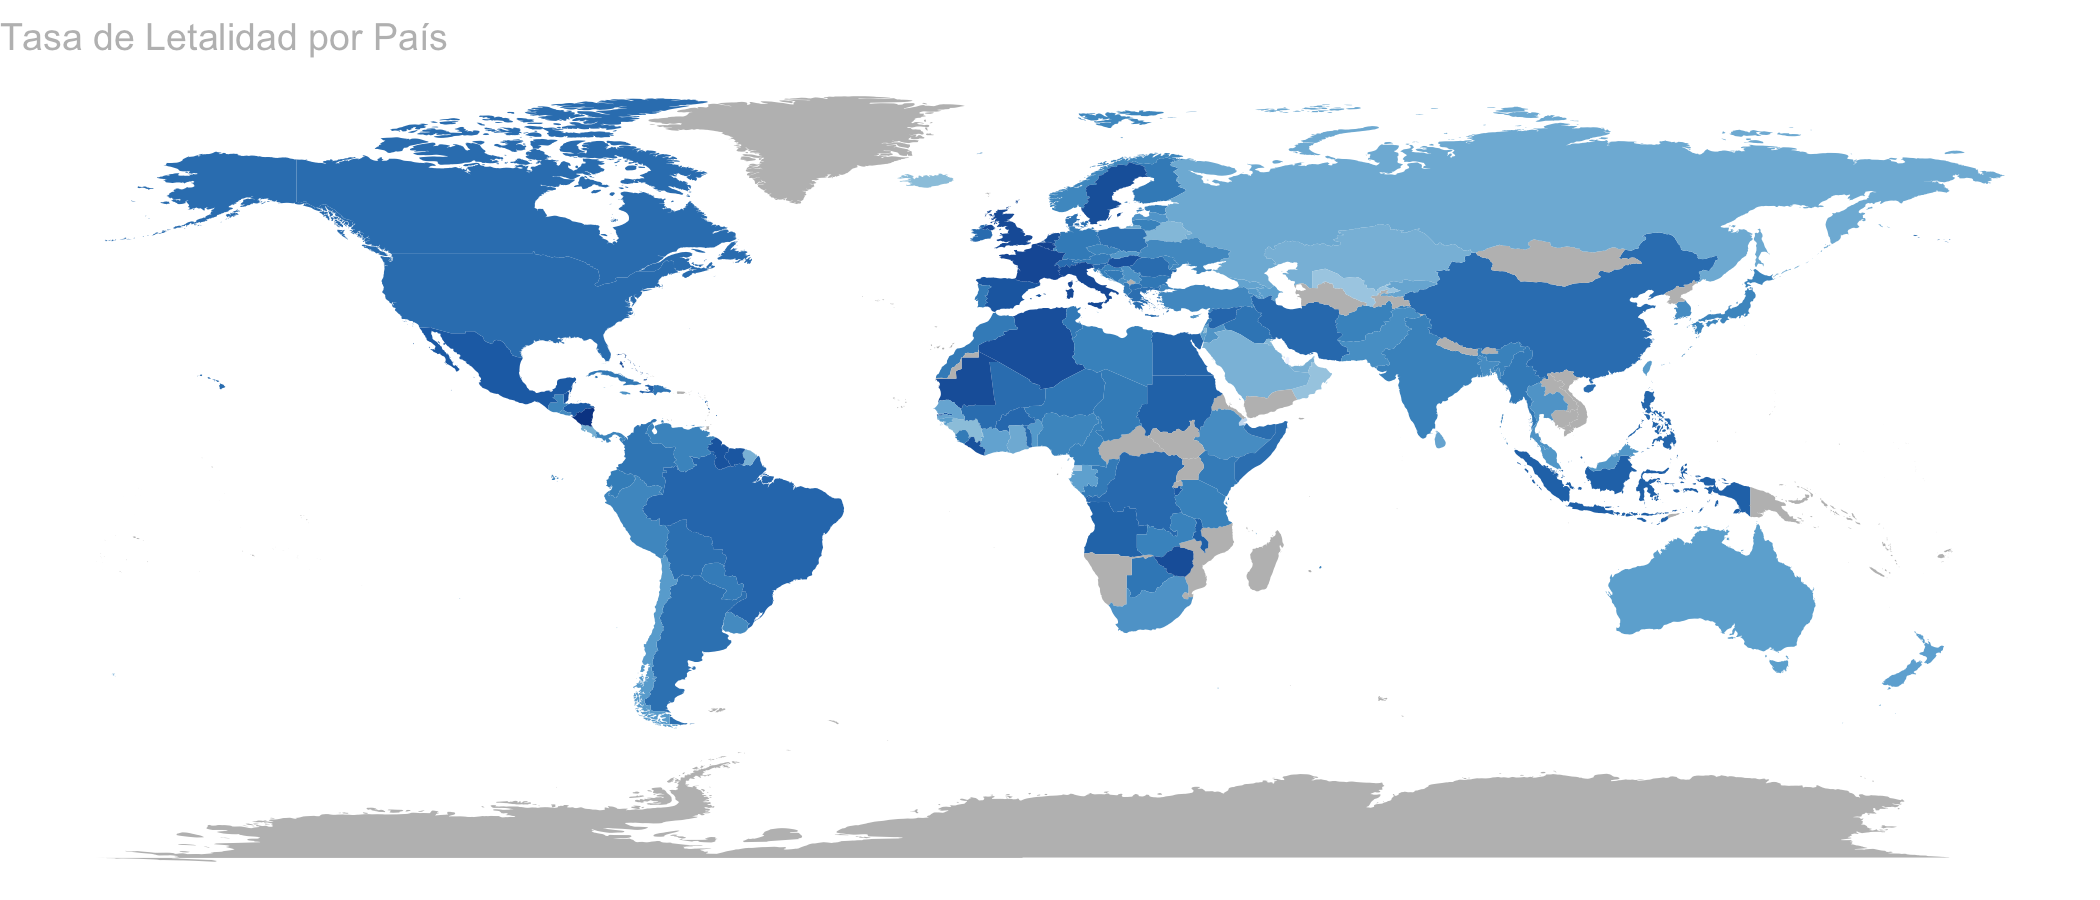

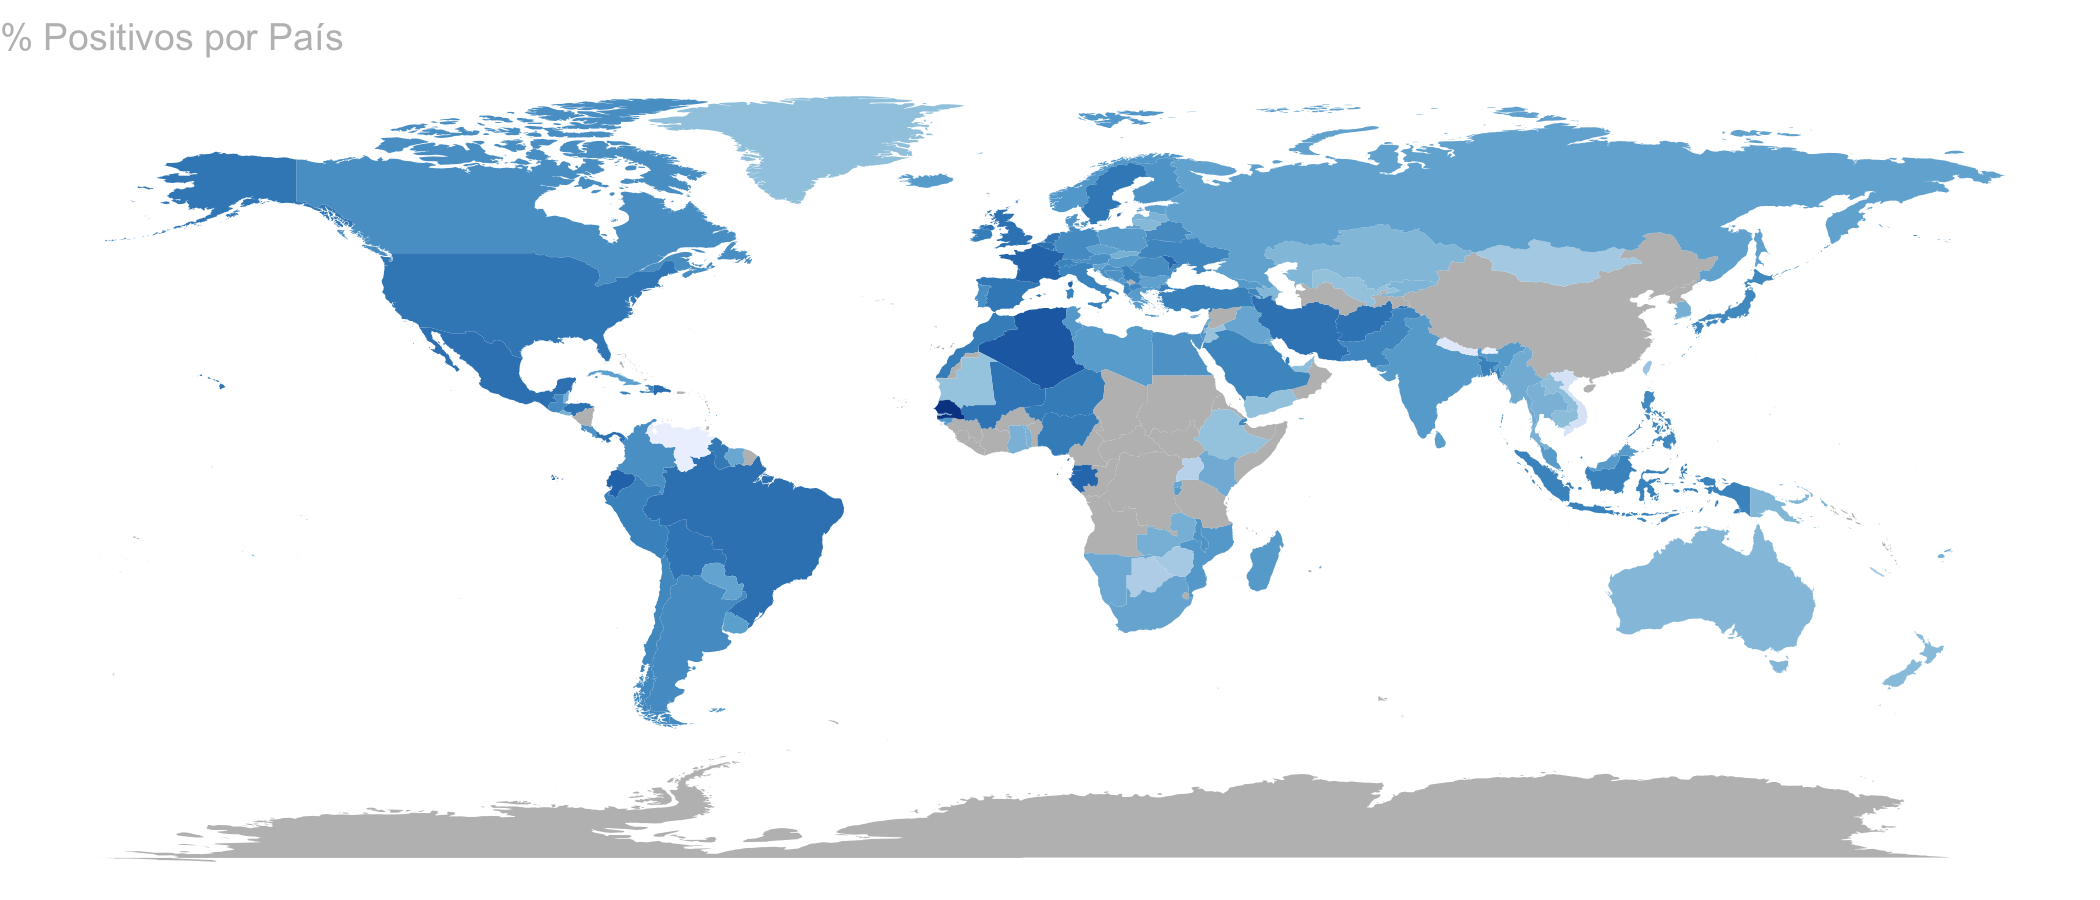

In [8]:
data %>%
    select(region = Country, x=fatality.rate) %>%
    world.map(theme = theme1, title = "Tasa de Letalidad por País", func = function(x){-log10(x)})

data %>%
    select(region = Country, x=positive.rate) %>%
    world.map(theme = theme1, title = "% Positivos por País",func = function(x){-log10(x)})

El gráfico siguiente muestra la relación entre el % de positivos y la tasa de letalidad de cada país. El tamaño de cada punto corresponde a los tests x millón de habitantes

Warning message:
“Removed 24 rows containing missing values (geom_point).”
Warning message:
“Removed 24 rows containing missing values (geom_point).”


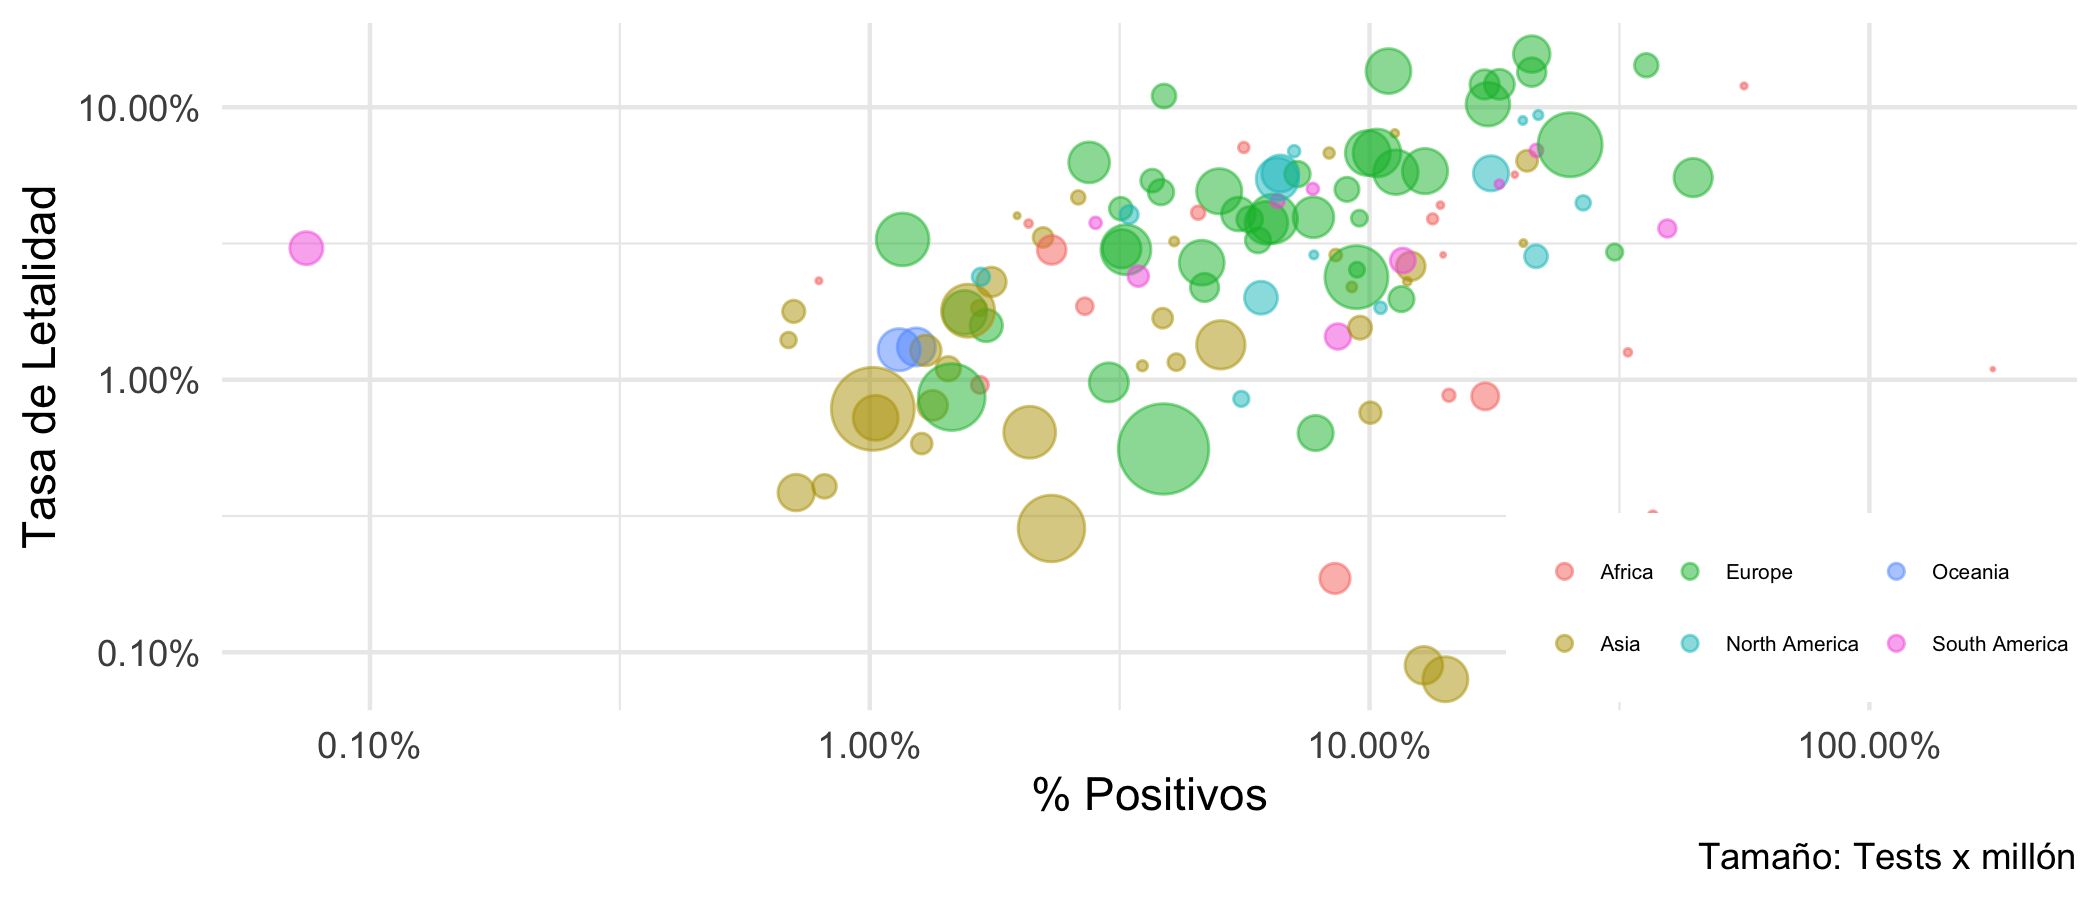

Warning message:
“Removed 24 rows containing missing values (geom_point).”


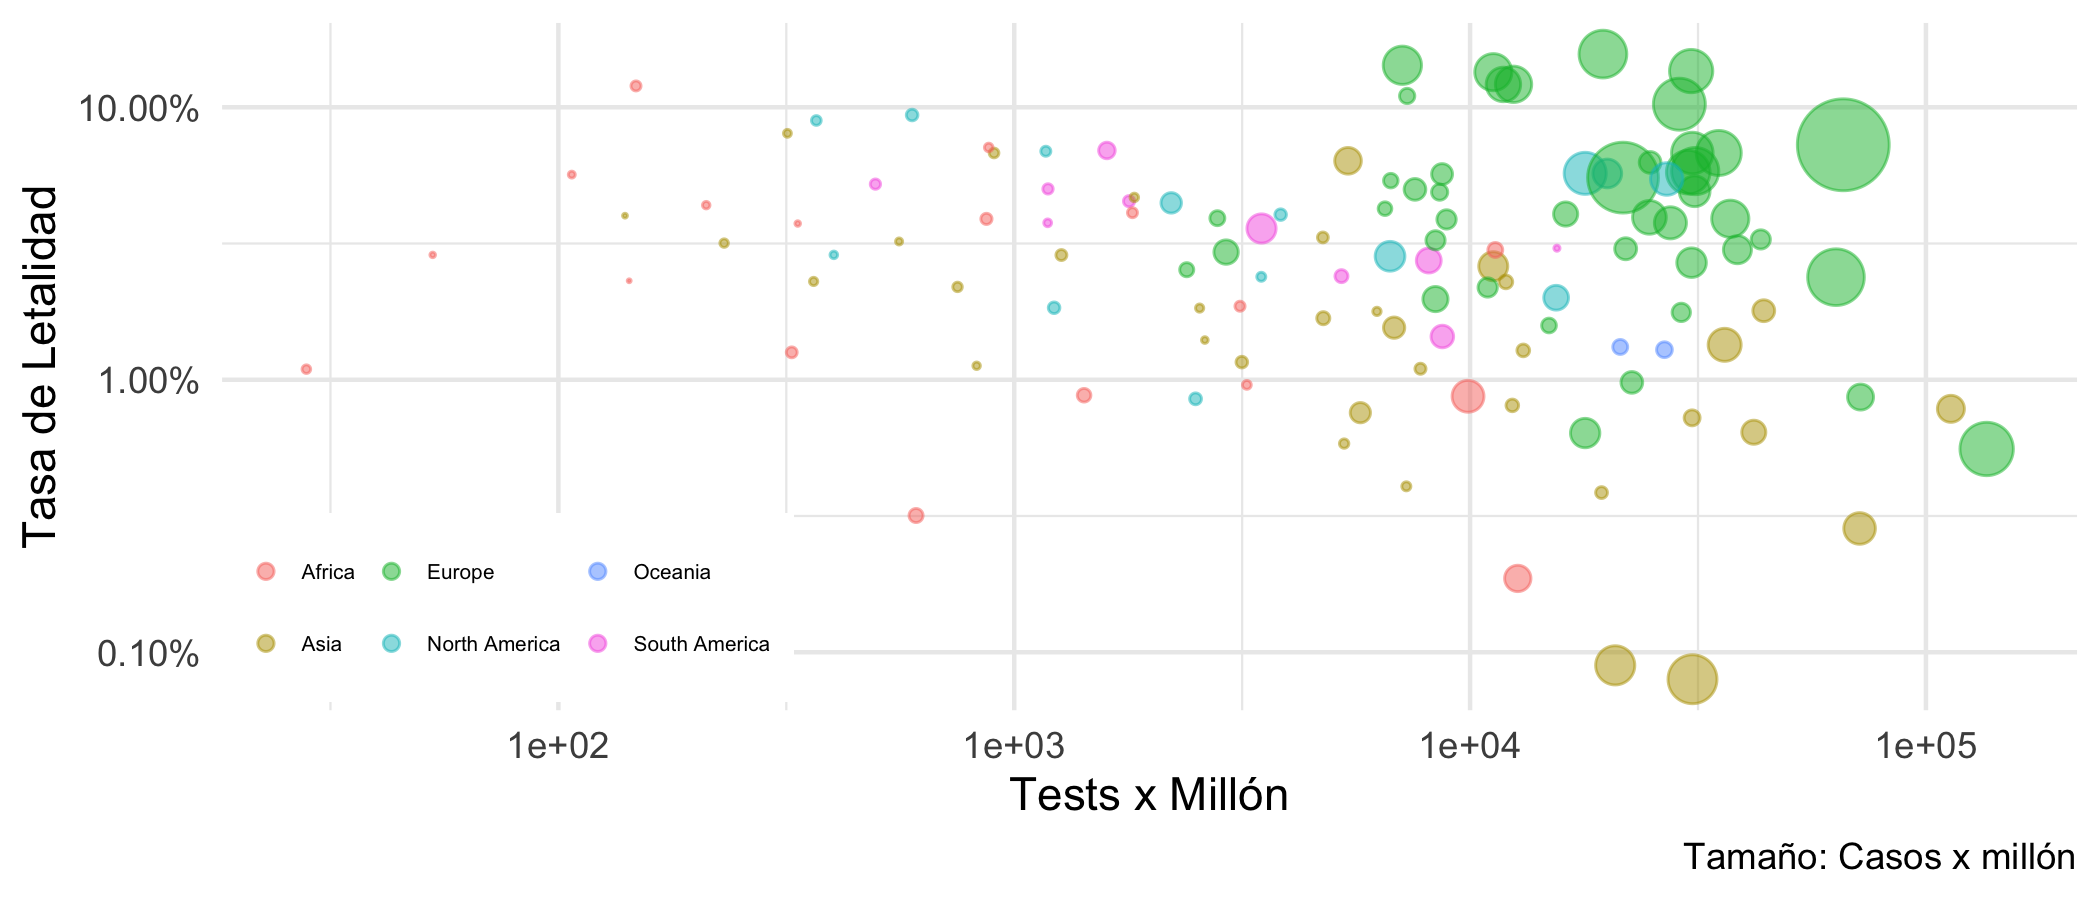

Warning message:
“Removed 65 rows containing missing values (geom_point).”


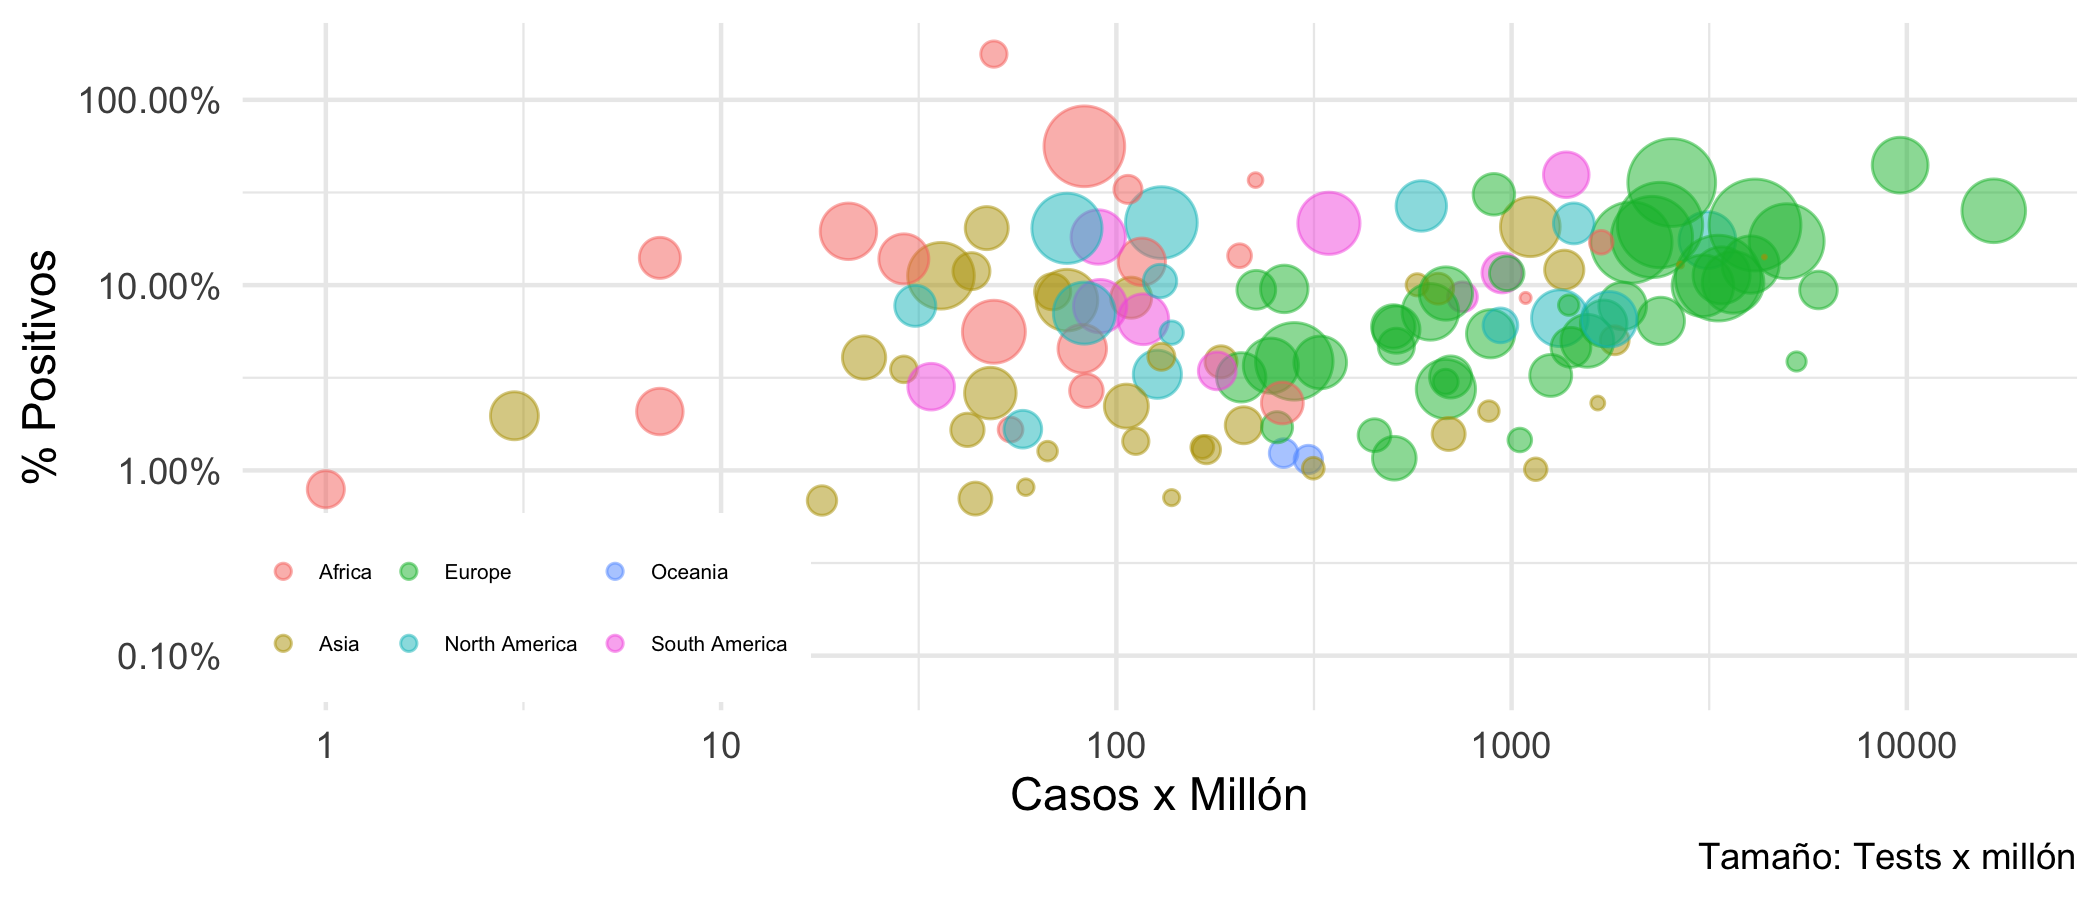

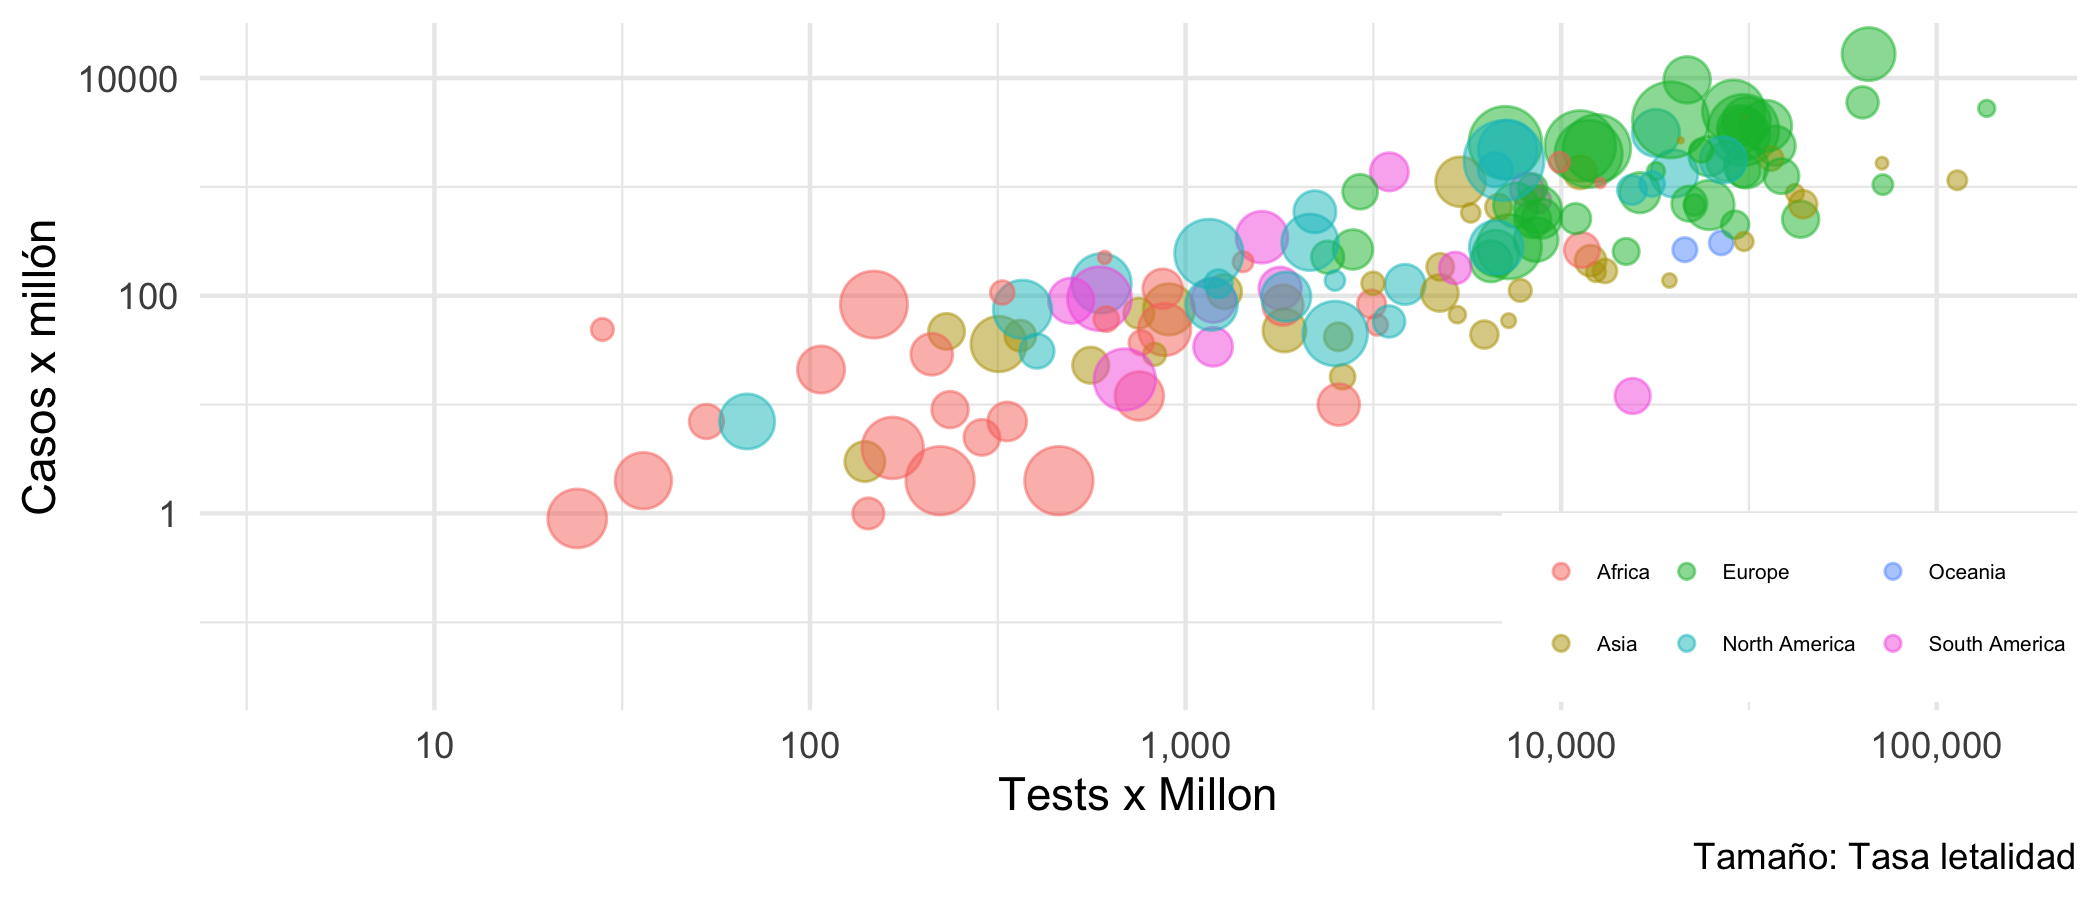

In [9]:
data %>%
    filter(TotalCases >= 100) %>%
    ggplot(aes(x=positive.rate, y=fatality.rate, size = Tests.1M, colour = Continent)) +
    geom_point(alpha=0.5) +
    xlab("% Positivos") + ylab("Tasa de Letalidad") +
    scale_size(range = c(.1, 10), name="Test x Millón", guide = 'none') +
    scale_y_log10(labels = scales::percent) +
    scale_x_log10(labels = scales::percent) +
#    scale_y_continuous(labels = scales::percent) +
#    scale_x_continuous(labels = scales::percent) +
    theme_minimal() + 
    theme(legend.title = element_text(size = 0), 
          legend.text=element_text(size = 5), 
          legend.direction = 'horizontal',
          legend.position = c(0.85, 0.15),
          legend.background = element_rect(fill = "white", color = NA),
         ) +
    labs(caption="Tamaño: Tests x millón")

data %>%
    filter(TotalCases >= 100) %>%
    ggplot(aes(x=Tests.1M, y=fatality.rate, size = Cases.1M, colour = Continent)) +
    geom_point(alpha=0.5) +
    xlab("Tests x Millón") + ylab("Tasa de Letalidad") +
    scale_size(range = c(.1, 10), name="Casos x Millón", guide = 'none') +
    scale_y_continuous(trans='log10', labels = scales::percent) +
    scale_x_continuous(trans='log10') +
    theme_minimal() + 
    theme(legend.title = element_text(size = 0), 
          legend.text=element_text(size = 5), 
          legend.direction = 'horizontal',
          legend.position = c(0.15, 0.15),
          legend.background = element_rect(fill = "white", color = NA),
         ) +
    labs(caption="Tamaño: Casos x millón")


data %>%
    filter(TotalCases >= 100) %>%
    ggplot(aes(x=Cases.1M, y=positive.rate, size = fatality.rate, colour = Continent)) +
    geom_point(alpha=0.5) +
    xlab("Casos x Millón") + ylab("% Positivos") +
    scale_size(range = c(.1, 10), name="Tasa de Letalidad", guide = 'none') +
    scale_y_continuous(trans='log10', labels = scales::percent) +
    scale_x_continuous(trans='log10') +
    theme_minimal() + 
    theme(legend.title = element_text(size = 0), 
          legend.text=element_text(size = 5), 
          legend.direction = 'horizontal',
          legend.position = c(0.15, 0.15),
          legend.background = element_rect(fill = "white", color = NA),
         ) +
    labs(caption="Tamaño: Tests x millón")

data %>%
#    filter(TotalCases >= 1000) %>%
    ggplot(aes(x=Tests.1M, y=Cases.1M, size=fatality.rate, colour = Continent)) +
    geom_point(alpha=0.5) +
    xlab("Tests x Millon") + ylab("Casos x millón") +
    scale_size(range = c(.1, 10), name="Casos x Millón", guide = 'none') +
    scale_y_continuous(trans='log10') +
    scale_x_continuous(trans='log10', labels = scales::comma) +
    theme_minimal() + 
    theme(legend.title = element_text(size = 0), 
          legend.text=element_text(size = 5), 
          legend.direction = 'horizontal',
          legend.position = c(0.85, 0.15),
          legend.background = element_rect(fill = "white", color = NA),
         ) +
    labs(caption="Tamaño: Tasa letalidad")


Y finalmente, el % de pacientes críticos, en relación a los casos activos

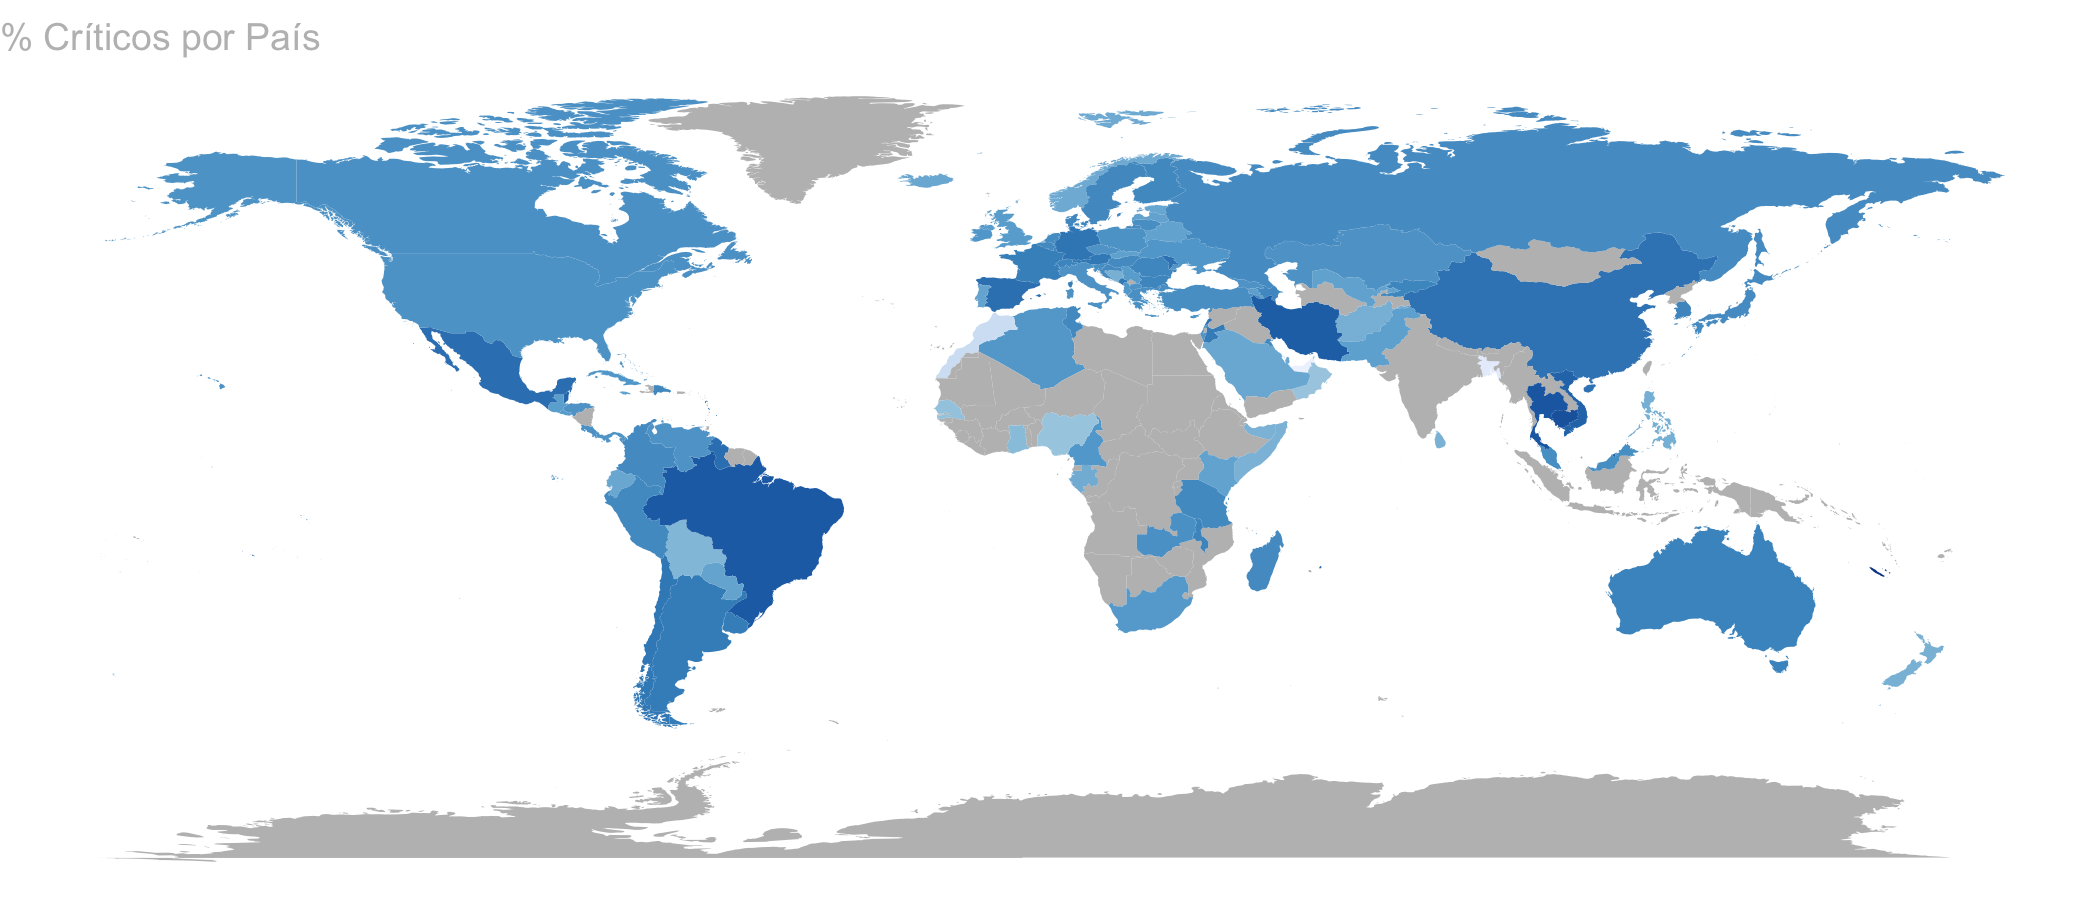

In [10]:
data %>%
    select(region = Country, x=critical.rate) %>%
    world.map(theme = theme1, title = "% Críticos por País", func = function(x){-log10(x)})

Warning message:
“Removed 68 rows containing missing values (geom_point).”


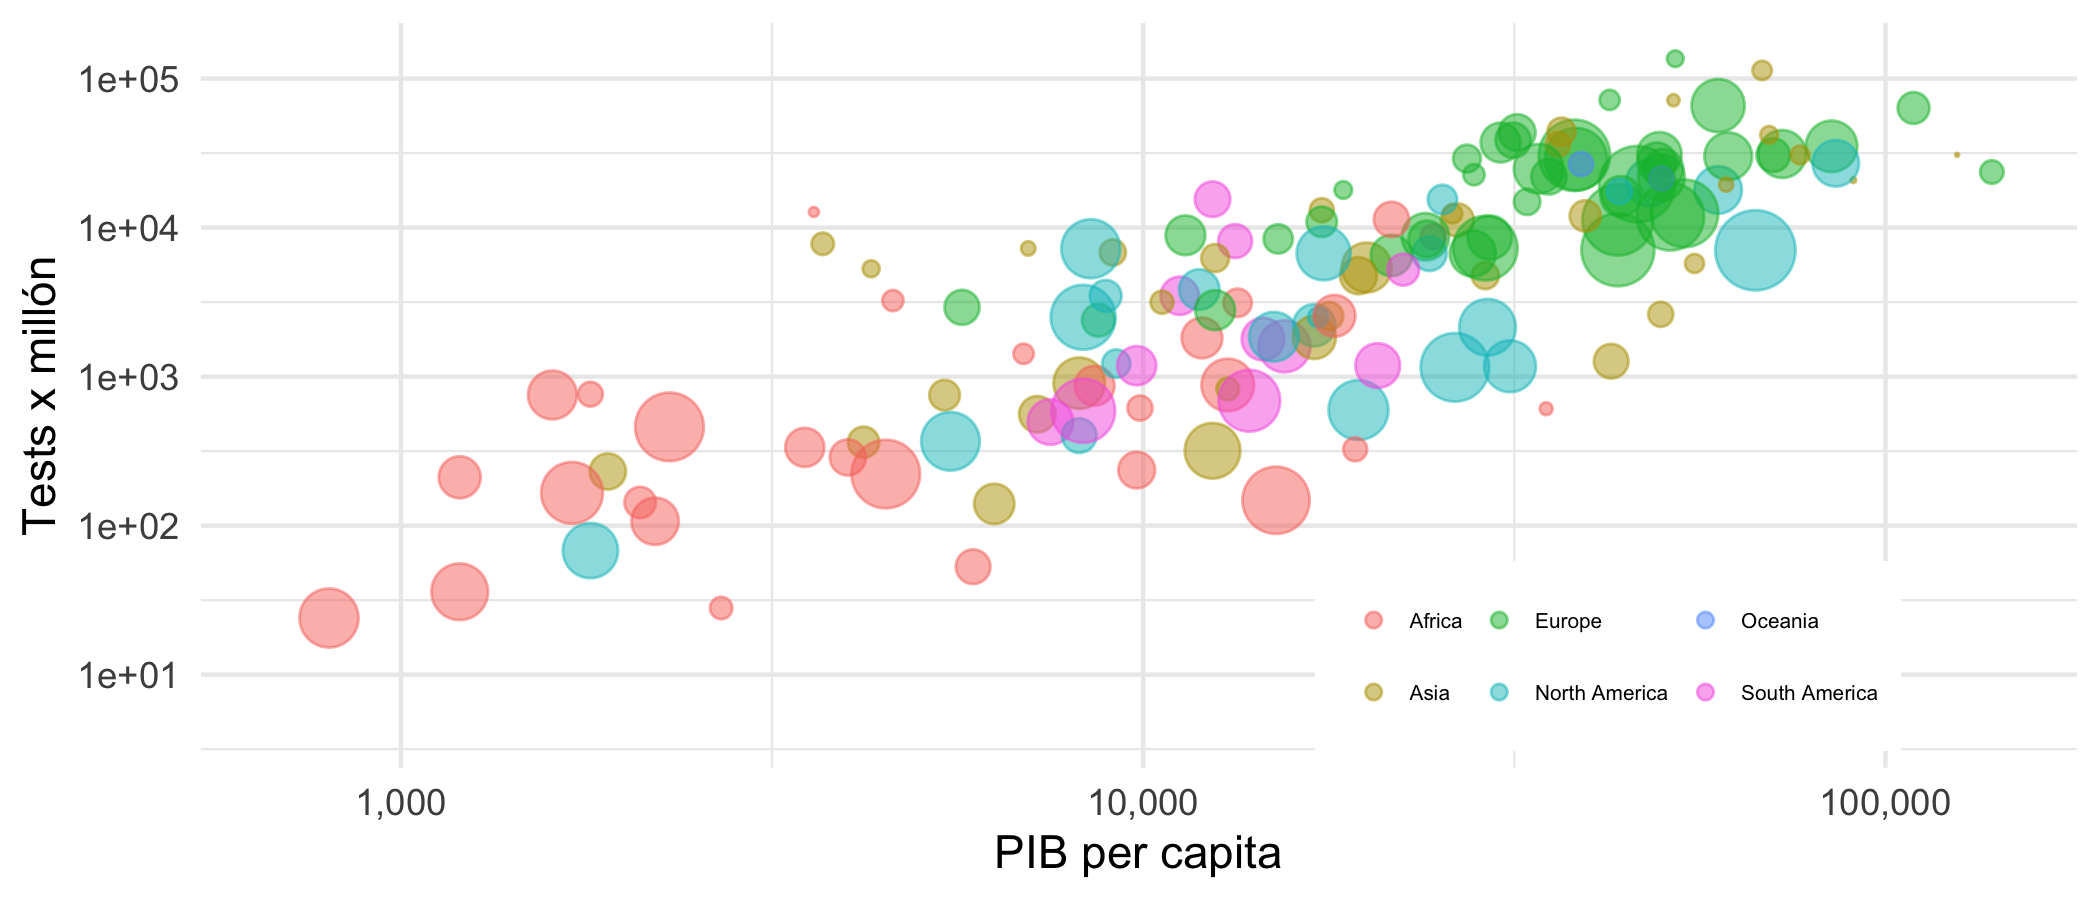

In [11]:
data2 <- left_join(data, gdp, by="Country") 

data2 %>%
    ggplot(aes(x = GDP.percapita, y = Tests.1M, size=fatality.rate, colour = Continent)) + 
    geom_point(alpha=0.5) + 
    xlab("PIB per capita") + ylab("Tests x millón") +
    scale_y_continuous(trans='log10') +
    scale_x_continuous(trans='log10', labels = scales::comma) +
    scale_size(range = c(.1, 10), name="Tasa de Letalidad", guide = 'none') +
    theme_minimal() + 
    theme(legend.title = element_text(size = 0), 
          legend.text=element_text(size = 5), 
          legend.direction = 'horizontal',
          legend.position = c(0.75, 0.15),
          legend.background = element_rect(fill = "white", color = NA),
         ) 

In [12]:
data2 %>% 
    filter(Continent == "South America") %>%
    arrange(desc(TotalDeaths))

Country          TotalCases NewCases TotalDeaths NewDeaths TotalRecovered
1  Brazil           73235      336      5083        20        32544         
2  Ecuador          24258       NA       871        NA         1557         
3  Peru             31190       NA       854        NA         9179         
4  Colombia          5949       NA       269        NA         1268         
5  Chile            14365       NA       207        NA         7710         
6  Argentina         4127       NA       207        NA         1162         
7  Bolivia           1053       39        55         2          110         
8  Uruguay            625        5        15        NA          394         
9  Venezuela          329       NA        10        NA          142         
10 Paraguay           239        9         9        NA          102         
11 Guyana              74       NA         8        NA           15         
12 French Guiana      125       NA         1        NA           93         
13 Suriname            10       NA         1        NA            7         
14 Falkland Islands    13       NA        NA        NA           11         
   ActiveCases Critical Cases.1M Deaths.1M TotalTests Tests.1M Continent    
1  35608       8318      345     24.0      339552       1597   South America
2  21830        146     1375     49.0       61529       3487   South America
3  21157        600      946     26.0      267612       8116   South America
4   4412        118      117      5.0       90899       1786   South America
5   6448        426      751     11.0      166165       8692   South America
6   2758        144       91      5.0       53600       1186   South America
7    888          3       90      5.0        5791        496   South America
8    216         11      180      4.0       18140       5222   South America
9    177          3       12      0.4      440966      15507   South America
10   128          1       34      1.0        8444       1184   South America
11    51          5       94     10.0         464        590   South America
12    31         NA      419      3.0          NA         NA   South America
13     2         NA       17      2.0         404        689   South America
14     2         NA     3736       NA         353     101437   South America
   positive.rate fatality.rate growth.rate critical.rate GDP.percapita
1  0.2156812506  0.06940670    0.004609117 0.233599191   15500        
2  0.3942531164  0.03590568             NA 0.006688044   11200        
3  0.1165493326  0.02738057             NA 0.028359408   13300        
4  0.0654462645  0.04521768             NA 0.026745240   14500        
5  0.0864502151  0.01441002             NA 0.066066998   24600        
6  0.0769962687  0.05015750             NA 0.052211748   20700        
7  0.1818338802  0.05223172    0.038461538 0.003378378    7500        
8  0.0344542448  0.02400000    0.008064516 0.050925926   22400        
9  0.0007460893  0.03039514             NA 0.016949153   12400        
10 0.0283041213  0.03765690    0.039130435 0.007812500    9800        
11 0.1594827586  0.10810811             NA 0.098039216    8300        
12           NA  0.00800000             NA          NA      NA        
13 0.0247524752  0.10000000             NA          NA   13900        
14 0.0368271955          NA             NA          NA   96200